<a href="https://colab.research.google.com/github/VENKY2219/Fundamental/blob/main/HAND_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HAND WRITTEN DIGIT PREDICTION** -CLASSIFICATION ANALYSIS

OBJECTIVE: Handwritten digit recognition is an important application of machine learning, particularly in the field of computer vision.


DATA SOURCE: The Digits Dataset consists of 8*8 pixel images.The image attribute of the Dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

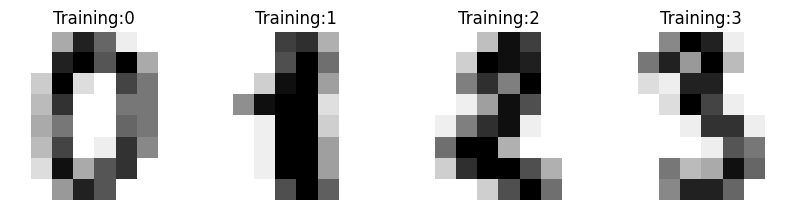

In [7]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i" % label)

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data = data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_pred = rf.predict(x_test)

In [30]:
y_pred

array([7, 1, 2, 2, 3, 5, 9, 0, 2, 6, 5, 3, 7, 5, 3, 9, 0, 1, 3, 9, 3, 0,
       8, 2, 5, 9, 0, 0, 8, 6, 6, 4, 8, 8, 4, 7, 9, 1, 0, 7, 3, 4, 1, 0,
       5, 5, 4, 2, 7, 1, 5, 1, 6, 4, 2, 4, 7, 4, 7, 0, 4, 6, 1, 3, 1, 2,
       8, 1, 5, 8, 9, 1, 2, 5, 4, 0, 1, 3, 9, 2, 2, 6, 9, 0, 7, 1, 6, 9,
       6, 1, 9, 4, 8, 4, 6, 1, 2, 0, 4, 2, 3, 7, 5, 7, 8, 3, 1, 1, 6, 8,
       3, 1, 5, 9, 1, 1, 4, 1, 2, 9, 5, 3, 9, 5, 0, 8, 1, 1, 6, 8, 1, 1,
       8, 4, 7, 9, 8, 3, 3, 7, 1, 4, 0, 2, 3, 4, 7, 6, 7, 3, 6, 8, 1, 0,
       8, 1, 3, 7, 3, 7, 2, 6, 1, 0, 8, 4, 3, 1, 4, 8, 6, 7, 6, 8, 4, 3,
       3, 7, 3, 5, 5, 1, 4, 9, 7, 3, 5, 3, 3, 9, 5, 3, 3, 8, 0, 0, 7, 4,
       3, 3, 0, 9, 1, 0, 1, 9, 5, 0, 5, 5, 6, 7, 2, 8, 4, 1, 3, 9, 4, 0,
       2, 4, 2, 4, 7, 2, 4, 2, 2, 8, 4, 4, 2, 3, 9, 9, 8, 1, 9, 9, 4, 5,
       4, 1, 1, 1, 2, 7, 0, 6, 0, 6, 5, 9, 8, 5, 4, 5, 8, 2, 0, 8, 9, 7,
       1, 7, 8, 2, 0, 3, 9, 6, 9, 8, 8, 5, 2, 0, 1, 4, 1, 4, 1, 4, 3, 7,
       7, 6, 9, 1, 3, 4, 9, 2, 9, 2, 9, 3, 0, 3, 9,

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 51,  1,  0,  0,  0],
       [ 1,  2,  0,  0,  1,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  1,  1],
       [ 0,  1,  3,  0,  1,  1,  0,  0, 45,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 57]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.95      1.00      0.98        63
           2       0.95      1.00      0.97        54
           3       0.98      0.98      0.98        58
           4       0.93      0.98      0.96        58
           5       0.96      0.98      0.97        52
           6       0.97      0.90      0.94        42
           7       1.00      0.96      0.98        57
           8       0.94      0.88      0.91        51
           9       0.97      0.95      0.96        60

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [34]:
y_pred.shape

(540,)

In [35]:
y_test.shape

(540,)